In [1]:
import numpy as np
import pandas as pd
from mlxtend.evaluate import permutation_test
import matplotlib.pyplot as plt_raw

In [2]:
Permutation_p_value = 0.05/8

In [3]:
# p_value = permutation_test(
# Filtered_Pre_Trial_Initi_Rate, Filtered_Entire_Trial_Rate, paired=True, method="approximate", seed=0, num_rounds=10000
# )

In [4]:
# Unpaired Permeutation test
# http://rasbt.github.io/mlxtend/user_guide/evaluate/permutation_test/

treatment = [ 28.44,  29.32,  31.22,  29.58,  30.34,  28.76,  29.21,  30.4 ,
              31.12,  31.78,  27.58,  31.57,  30.73,  30.43,  30.31,  30.32,
              29.18,  29.52,  29.22,  30.56]
# control = [ 33.51,  30.63,  32.38,  32.52,  29.41,  30.93,  49.78,  28.96,
#             35.77,  31.42,  30.76,  30.6 ,  23.64,  30.54,  47.78,  31.98]


control = [ 33.51,  30.63,  32.38,  32.52,  29.41,  30.93,  49.78,  28.96,
            35.77,  31.42,  30.76,  30.6 ,  23.64,  30.54,  47.78,  31.98,
            34.52,  32.42,  31.32,  40.72]


from mlxtend.evaluate import permutation_test

p_value = permutation_test(treatment, control,
                           method='approximate',
                           num_rounds=10000,
                           seed=0)
print(p_value)
#########0.0066993300669933005

0.0066993300669933005


In [5]:
#Paired Permeutation test  (l)
#http://rasbt.github.io/mlxtend/user_guide/evaluate/permutation_test/

from mlxtend.evaluate import permutation_test

lakes_1980 = [3.67, 1.72, 3.46, 2.60, 2.03, 2.10, 3.01]
lakes_1990 = [2.11, 1.79, 2.71, 1.89, 1.69, 1.71, 2.01]

p_value = permutation_test(
    lakes_1980, lakes_1990, paired=True, method="approximate", seed=0, num_rounds=100000
)

print('P value: %.6f' % p_value)

####P value: 0.031

P value: 0.030960


In [6]:
#Paired Permeutation test  (l)
#http://rasbt.github.io/mlxtend/user_guide/evaluate/permutation_test/

from mlxtend.evaluate import permutation_test

# Treatment = [3.33,3.67,2.67,3.33,3.33,3.67,4.67,2.67,6,4.33,3.33,0.67,1.33,0.33,2]
# Control = [0.27,0.59,0.32,0.19,1.26,0.11,0.3,0.4,1.59,0.6,0.65,0.69,1.26,0.23,0.38]

Control = [10,30,50,85,100,10,30,50,85,100]
Treatment = [25,45,65,70,90,25,45,65,70,90]

p_value = permutation_test(
    Treatment, Control, paired=True, method="approximate", seed=0, num_rounds=100000
)

print('P value: %.5f' % p_value)

####P value: 0.031

P value: 0.39822


Num of cases 100000
Data Mean Difference (T-C):  -4.0
Bigger (1):  39865
Smaller (-1):  0
Same (0):  60135
Perm_P_Value:   0.3986560134398656


Text(0.5, 0, 'Mean Difference (Treatment - Control)')

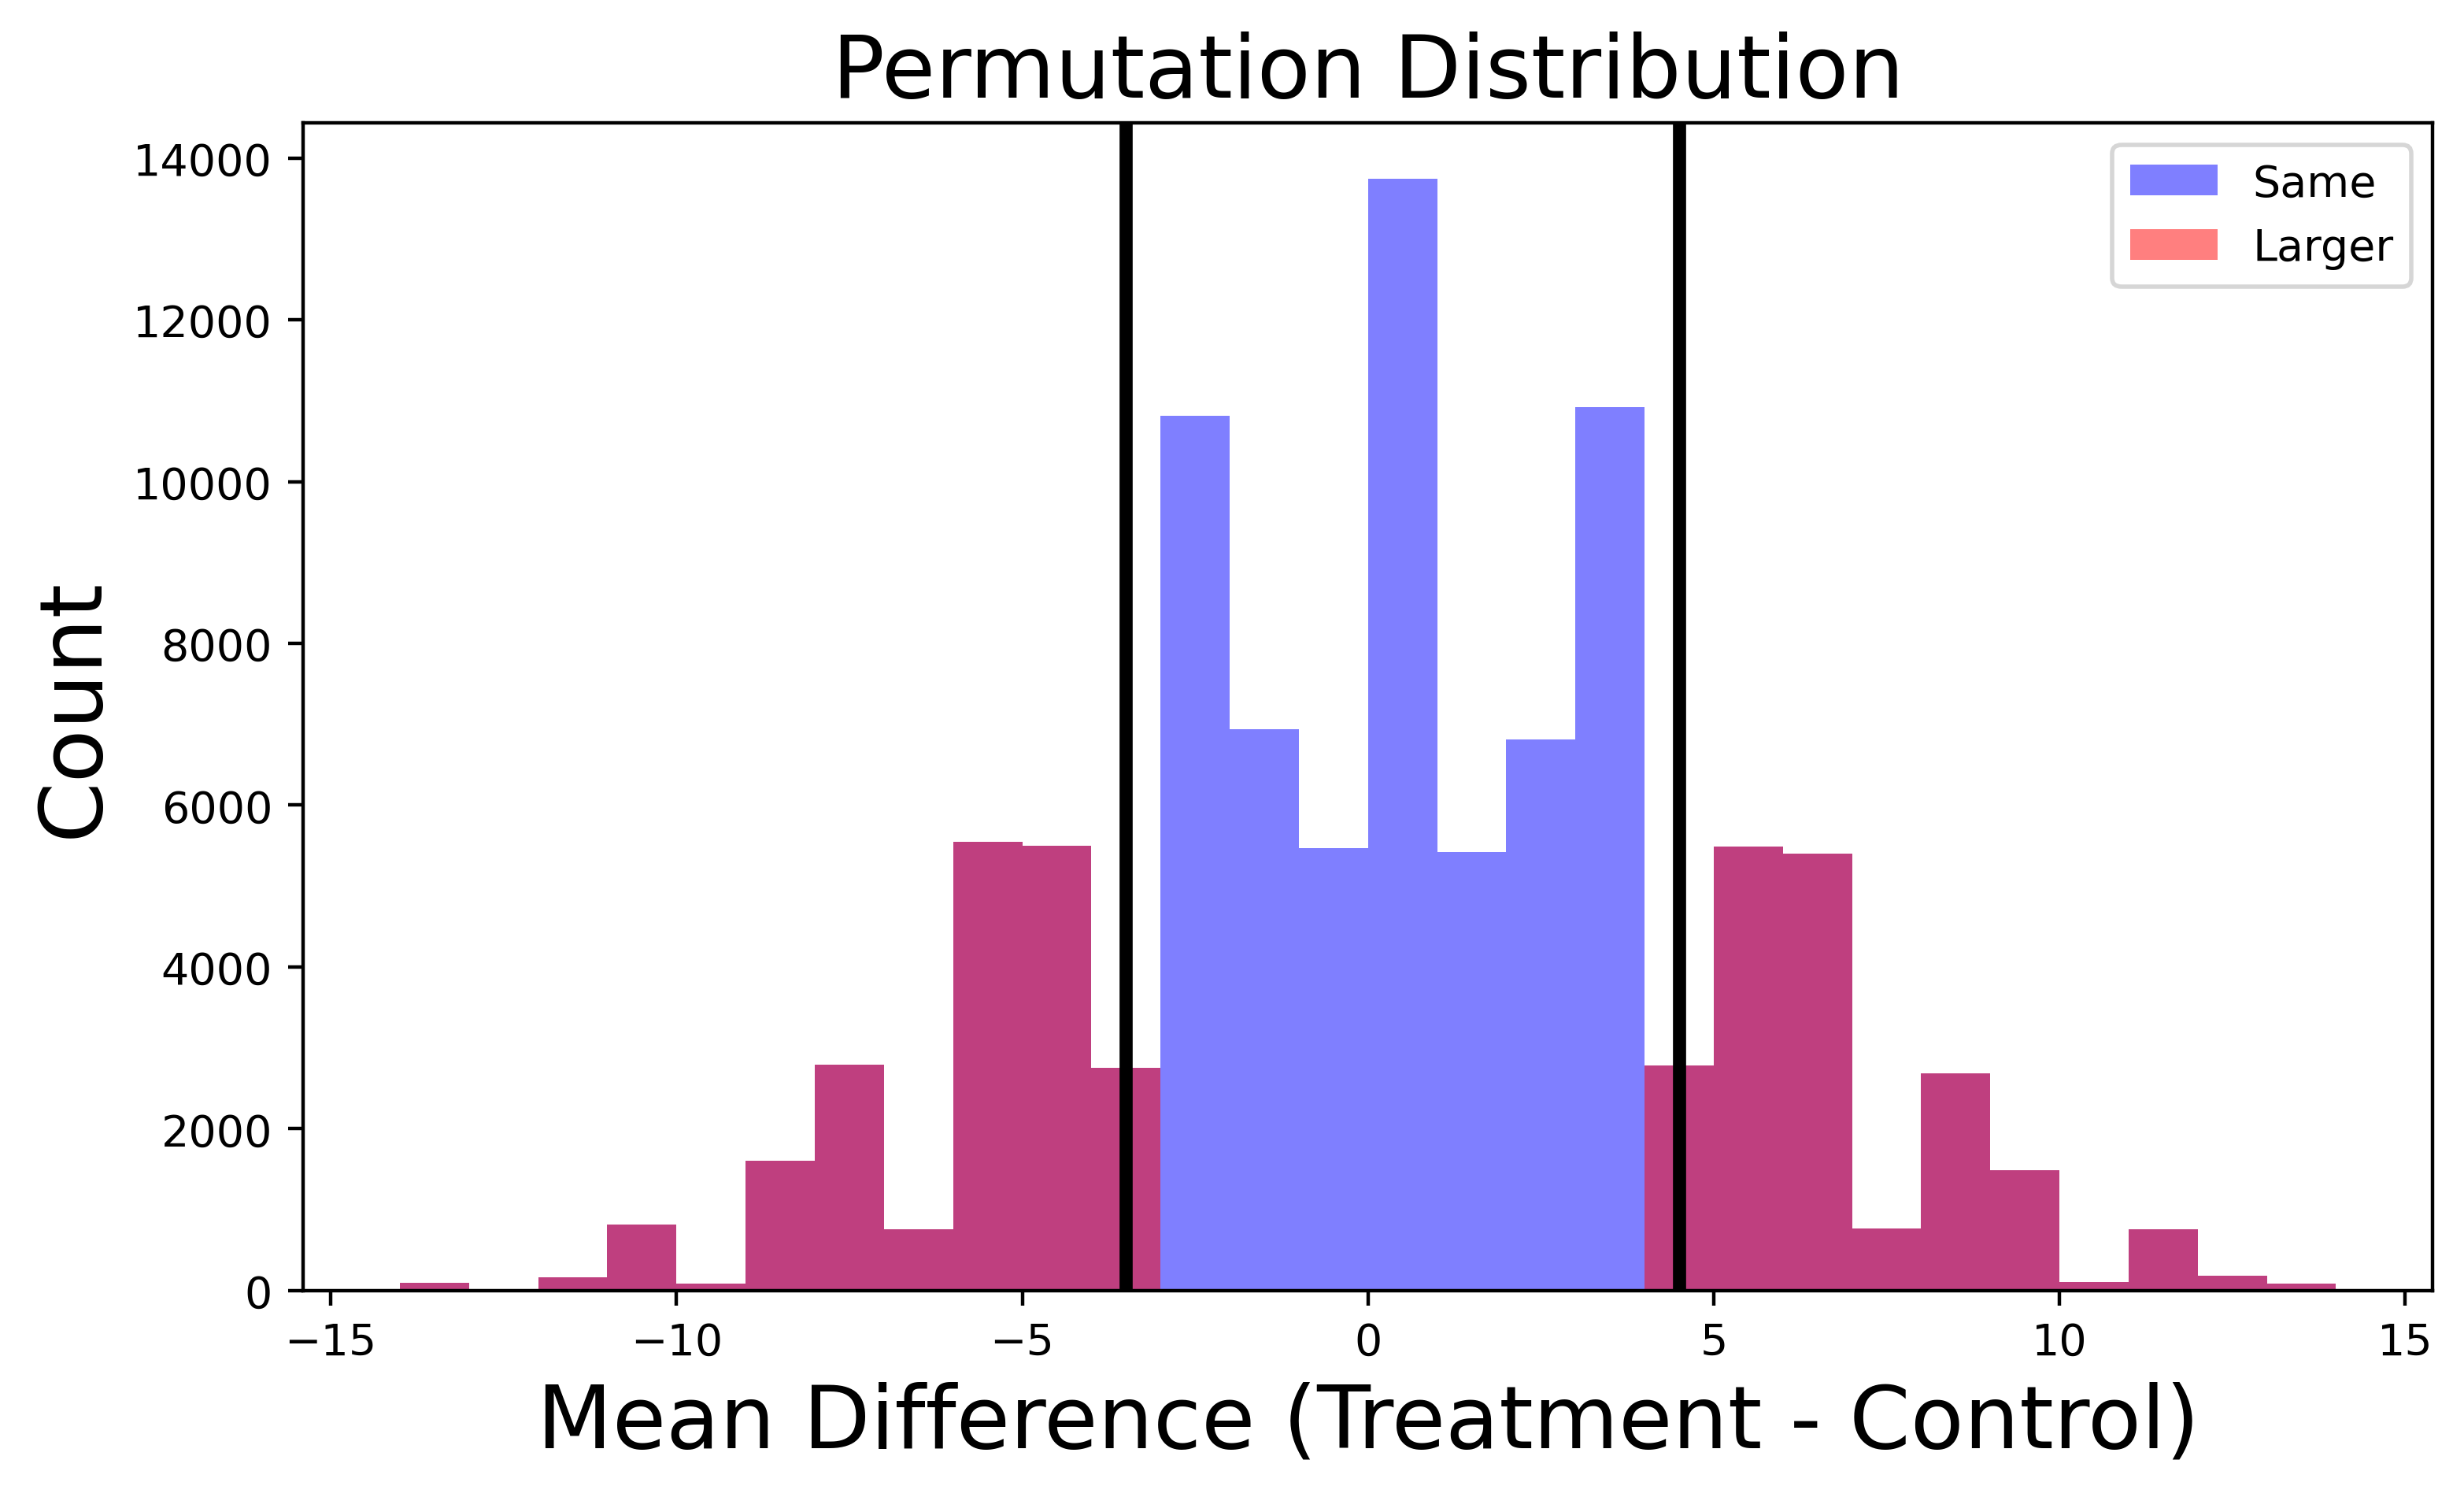

In [7]:

#. Re-create Paired Permutation
import numpy as np
###############################################
# Treatment = [3.67, 1.72, 3.46, 2.60, 2.03, 2.10, 3.01]
# Control = [2.11, 1.79, 2.71, 1.89, 1.69, 1.71, 2.01]

# Treatment = [3.33,3.67,2.67,3.33,3.33,3.67,4.67,2.67,6,4.33,3.33,0.67,1.33,0.33,2]
# Control = [0.27,0.59,0.32,0.19,1.26,0.11,0.3,0.4,1.59,0.6,0.65,0.69,1.26,0.23,0.38]

Treatment = [10,30,50,85,100,10,30,50,85,100]
Control  = [25,45,65,70,90,25,45,65,70,90]

Num_Rounds = 100000
###############################################

Treatment_Mean = np.mean(Treatment)
Control_Mean= np.mean(Control)

Temp_Diff= []
Perm_Results =[]

case_larger =[]
case_smaller=[]
case_same =[]

###############################################
##### Step 4:  Repeat for 10,000 times 

for ii in range (Num_Rounds): 
    
    Temp_Treatment = []
    Temp_Control =[]
    
    ###############################################
    # Step 1: Randomly shuffle Treatment and Control 

    if (len(Treatment) == len(Control)):

        temp_x = np.random.randint(0, 2, size=len(Treatment))# Generate random int between 0 and 1

        for i in range(len(Treatment)):

            # No flip
            if (temp_x[i] == 0):
                Temp_Treatment.append(Treatment[i])
                Temp_Control.append(Control[i])

            # flip
            else:
                Temp_Treatment.append(Control[i])
                Temp_Control.append(Treatment[i])

    else:
        print('Data needs to be the same length')
        
    ###############################################
    # Step 2:  Calculate means of Treatment and Control

    Temp_Control_Mean = np.mean(Temp_Control)
    Temp_Treatment_Mean = np.mean(Temp_Treatment)

    ###############################################
    # Step 3: Calculate the Differences in means of Treatment and Control

    Temp_Diff.append( Temp_Treatment_Mean - Temp_Control_Mean)

    ###############################################
    # Step 5
    # Two tailed test, see if the difference is more extreme than the original sample mean difference
                
    if((abs(Temp_Treatment_Mean - Temp_Control_Mean)>= abs(Treatment_Mean-Control_Mean))):
        Perm_Results.append(1)
        case_larger.append(Temp_Treatment_Mean - Temp_Control_Mean)
    elif(abs((Temp_Treatment_Mean - Temp_Control_Mean)<= -abs(Treatment_Mean-Control_Mean))):
        Perm_Results.append(-1)
        case_smaller.append(Temp_Treatment_Mean - Temp_Control_Mean)
    else:
        Perm_Results.append(0)
        case_same.append(Temp_Treatment_Mean - Temp_Control_Mean)

Perm_P_Value = (Perm_Results.count(1)+Perm_Results.count(-1)+1)/(len(Perm_Results)+1)

print('Num of cases',len(Perm_Results))
print('Data Mean Difference (T-C): ', (Treatment_Mean-Control_Mean))
print('Bigger (1): ',Perm_Results.count(1))
print('Smaller (-1): ',Perm_Results.count(-1))
print('Same (0): ',Perm_Results.count(0))
print('Perm_P_Value:  ', Perm_P_Value)


############################
##.  Histogram
#####################
#Bin_Width = 0.05
Bin_Width = 1
#Bin_Width = 0.075

fig = plt_raw.figure(figsize =(19.2, 10.8), dpi = 400.0)
ax = fig.add_subplot(2,2 ,4)

dist_Three= Temp_Diff
if(len(dist_Three) >0):
    plt_raw.hist(dist_Three, bins=np.arange(min(dist_Three), max(dist_Three) + Bin_Width, Bin_Width),  alpha=0.5,label = 'Same', color= 'blue')

dist =case_larger
if(len(dist) >0):
    plt_raw.hist(dist, bins=np.arange(min(dist), max(dist) + Bin_Width, Bin_Width),  alpha=0.5, label= 'Larger', color= 'red')

dist_Two= case_smaller
if(len(dist_Two) >0):
    plt_raw.hist(dist_Two, bins=np.arange(min(dist_Two), max(dist_Two) + Bin_Width, Bin_Width),  alpha=0.5,label = 'Smaller', color= 'lime')

plt_raw.axvline(x=(Treatment_Mean-Control_Mean+Bin_Width/2), c='k', lw=3)
plt_raw.axvline(x=-(Treatment_Mean-Control_Mean)+Bin_Width/2, c='k', lw=3)


plt_raw.legend(loc='upper right') 
plt_raw.title('Permutation Distribution', fontdict=None, loc='center', size = 20)
plt_raw.ylabel('Count', size = 20)
plt_raw.xlabel('Mean Difference (Treatment - Control)', size = 20)
#plt_raw.xlabel('Mean Difference (Cue - Baseline)', size = 20)
#plt_raw.xlim(-2.5, 2.6 )
#plt_raw.ylim(0, 200 )

In [8]:
        # For One tailed Test
        #     if(((Temp_Treatment_Mean - Temp_Control_Mean)>= (Treatment_Mean-Control_Mean))):
        #         Perm_Results.append(1)
        #         case_larger.append(Temp_Treatment_Mean - Temp_Control_Mean)
        #     elif(((Temp_Treatment_Mean - Temp_Control_Mean)<= -(Treatment_Mean-Control_Mean))):
        #         Perm_Results.append(-1)
        #         case_smaller.append(Temp_Treatment_Mean - Temp_Control_Mean)
        #     else:
        #         Perm_Results.append(0)
        #         case_same.append(Temp_Treatment_Mean - Temp_Control_Mean)